In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from patsy import dmatrices


In [2]:
df = sm.datasets.fair.load_pandas().data

In [3]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
df['affair'] = (df.affairs>0).astype(int)

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
df.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [7]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.961430,1.0,4.0,4.0,5.000000,5.000000
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.000000,42.000000
yrs_married,6366.0,9.009425,7.280120,0.5,2.5,6.0,16.500000,23.000000
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.000000,5.500000
religious,6366.0,2.426170,0.878369,1.0,2.0,2.0,3.000000,4.000000
educ,6366.0,14.209865,2.178003,9.0,12.0,14.0,16.000000,20.000000
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.000000,6.000000
occupation_husb,6366.0,3.850141,1.346435,1.0,3.0,4.0,5.000000,6.000000
affairs,6366.0,0.705374,2.203374,0.0,0.0,0.0,0.484848,57.599991
affair,6366.0,0.322495,0.467468,0.0,0.0,0.0,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [10]:
df.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

[Text(0.5, 1.0, 'Marriage Ratings')]

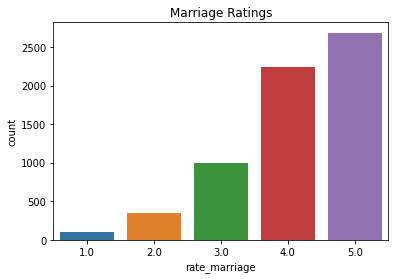

In [11]:
sns.countplot(x = df['rate_marriage']).set(title = 'Marriage Ratings')

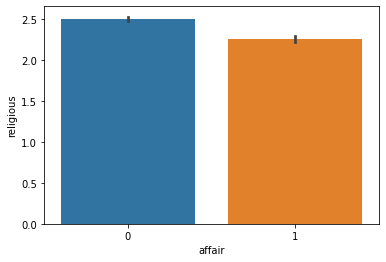

In [12]:
sns.barplot(x = 'affair', y = 'religious', data = df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Age distribution')]

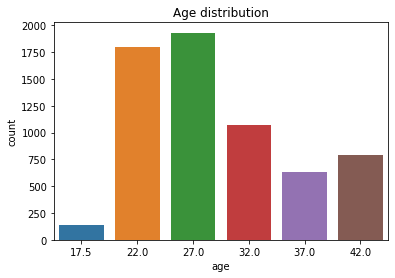

In [15]:
sns.countplot(df['age']).set(title = 'Age distribution')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Number of Childrens')]

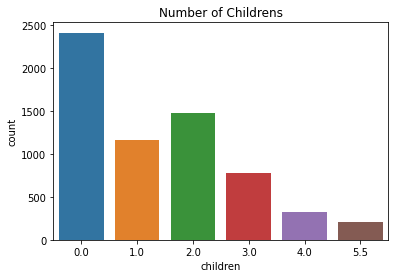

In [16]:
sns.countplot(df['children']).set(title = 'Number of Childrens')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Education Level')]

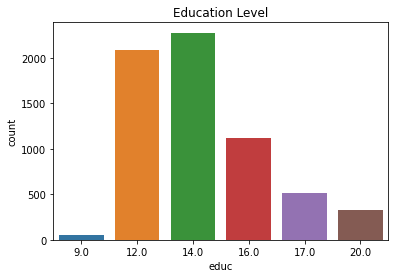

In [17]:
sns.countplot(df['educ']).set(title = 'Education Level')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Womens Occupation')]

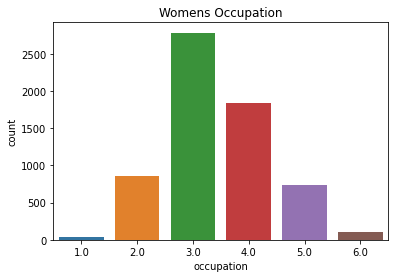

In [18]:
sns.countplot(df['occupation']).set(title = 'Womens Occupation')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Husbands Occupation')]

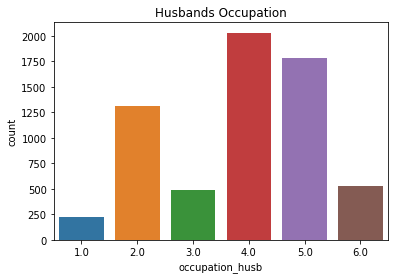

In [19]:
sns.countplot(df['occupation_husb']).set(title = 'Husbands Occupation')

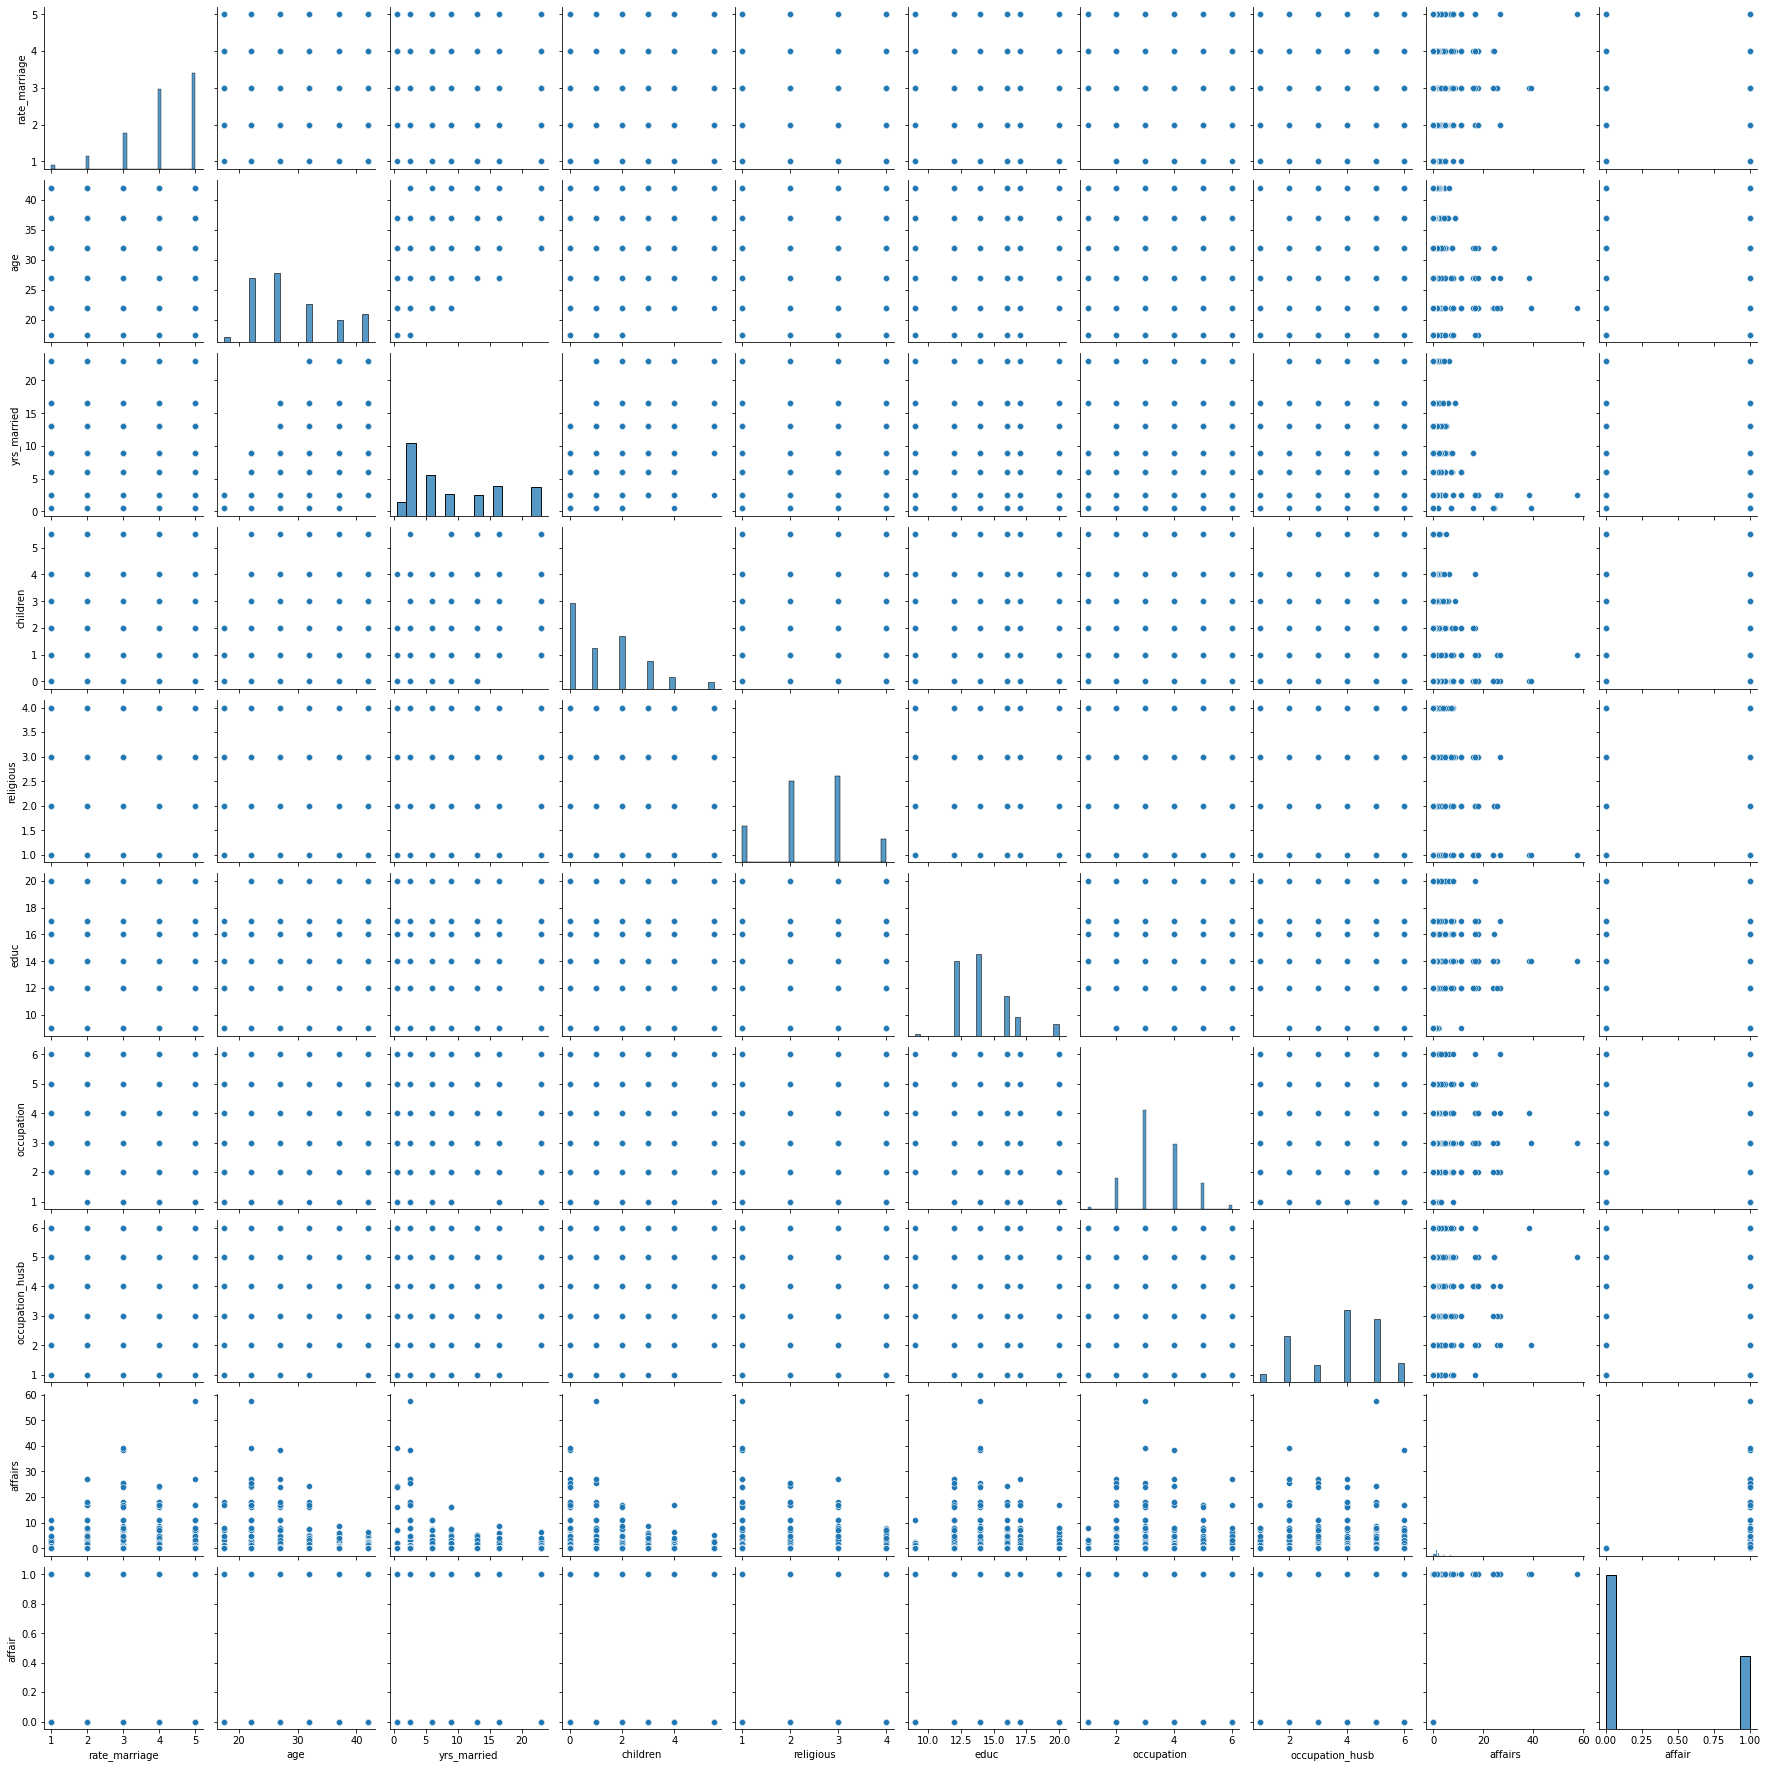

In [20]:
sns.pairplot(data = df)

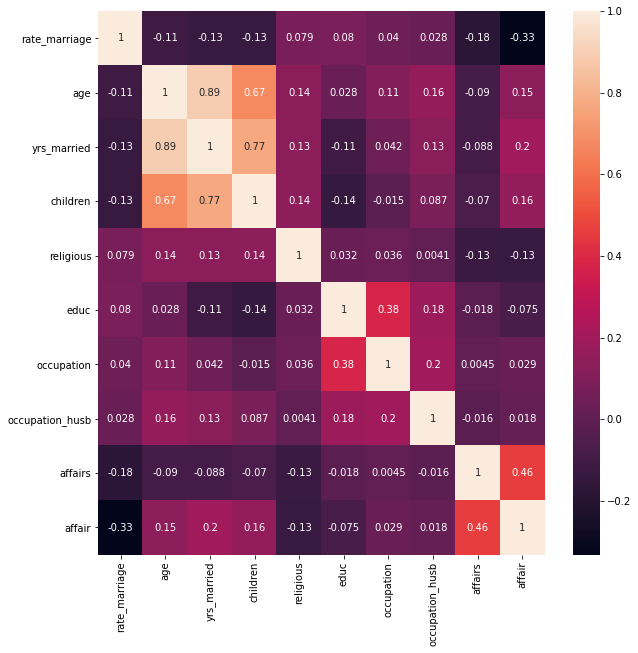

In [22]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [27]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', df, return_type="dataframe")


In [28]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [29]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [23]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
print('Train set Shape: ', X_train.shape)
print('Test set Shape: ', X_test.shape)
print('Train label shape: ', y_train.shape)
print('Test label shape: ', y_test.shape)

Train set Shape:  (5092, 17)
Test set Shape:  (1274, 17)
Train label shape:  (5092,)
Test label shape:  (1274,)


In [32]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [33]:
lor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = lor.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
y_pred_prob = lor.predict_proba(X_test)
y_pred_prob

array([[0.68315291, 0.31684709],
       [0.50569222, 0.49430778],
       [0.69949574, 0.30050426],
       ...,
       [0.7495129 , 0.2504871 ],
       [0.62476872, 0.37523128],
       [0.60520463, 0.39479537]])

In [38]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head(10)

,Actual,Predicted
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,0.0
6,0.0,1.0
7,0.0,1.0
8,0.0,0.0
9,1.0,0.0


In [40]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [41]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Accuracy Score: 0.728414442700157


In [42]:
print(f'Classification Report: {classification_report(y_test, y_pred)}')

Classification Report:               precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       849
         1.0       0.65      0.40      0.49       425

    accuracy                           0.73      1274
   macro avg       0.70      0.65      0.65      1274
weighted avg       0.72      0.73      0.71      1274



In [43]:
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

Confusion Matrix: [[759  90]
 [256 169]]
